In [1]:
#standard modules
import os
import glob

#import mdanalyis modules and packages
import MDAnalysis as mda
from MDAnalysis.analysis import rms, align, distances

#matplotlib
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab
import matplotlib as mpl

#numpy
import numpy as np

#pandas
import pandas as pd

#nglview
import nglview

#seaborn
import seaborn as sns

#scipy
from scipy.stats import gaussian_kde

#sklearn
from sklearn import preprocessing

In [2]:
pwd

'/Users/javingfun/Library/CloudStorage/OneDrive-UCSanDiego/UCSD/PhD/Jupyter Notebooks'

In [3]:
def make_universe(path,replica):
    
    #obtain trajectory and topology from file, create a universe
    if replica == 0:
        topology = glob.glob(os.path.join(path,'*.pdb'))
        u = mda.Universe(topology[0])
        
    
    else:
        topology = glob.glob(os.path.join(path,'*.prmtop'))
        trajectory = glob.glob(os.path.join(path, '*{rep}.nc'.format(rep=replica))) 
        u = mda.Universe(topology[0], trajectory[0])
        
    return u

In [6]:
project_path = '/Users/javingfun/Library/CloudStorage/OneDrive-UCSanDiego/UCSD/PhD/Active/mpro-trajectories'

#apo path
apo_path = os.path.join(project_path,'mpro_apo')

apo_monomer_path = os.path.join(apo_path,'mpro_apo_monomer')
apo_dimer_path = os.path.join(apo_path,'mpro_apo_dimer')

#ens_path
ens_path = os.path.join(project_path,'mpro_ens')

ens_monomer_path = os.path.join(ens_path,'mpro_ens_monomer')
ens_dimer_path = os.path.join(ens_path,'mpro_ens_dimer')
ens_dimer_asym_path = os.path.join(ens_path,'mpro_ens_dimer_asym')

#nirm_path
nirm_path = os.path.join(project_path,'mpro_nirm')

nirm_monomer_path = os.path.join(nirm_path,'mpro_nirm_monomer')
nirm_dimer_path = os.path.join(nirm_path,'mpro_nirm_dimer')
nirm_dimer_asym_path = os.path.join(nirm_path,'mpro_nirm_dimer_asym')

#nat_path
nat_path = os.path.join(project_path,'mpro_nat')

nat_monomer_path = os.path.join(nat_path,'mpro_nat_monomer')
nat_dimer_path = os.path.join(nat_path,'mpro_nat_dimer')
nat_dimer_asym_path = os.path.join(nat_path,'mpro_nat_dimer_asym')

In [7]:
#apo 
am_0 = make_universe(apo_monomer_path,0)
am_1 = make_universe(apo_monomer_path,1)
am_2 = make_universe(apo_monomer_path,2)
am_3 = make_universe(apo_monomer_path,3)

ad_0 = make_universe(apo_dimer_path,0)
ad_1 = make_universe(apo_dimer_path,1)
ad_2 = make_universe(apo_dimer_path,2)
ad_3 = make_universe(apo_dimer_path,3)

/Users/javingfun/miniconda3/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/topology/PDBParser.py:442: UserWarning: PDB file contained CONECT record to TER entry. These are not included in bonds.
  warnings.warn(


In [8]:
#ens 
em_0 = make_universe(ens_monomer_path,0)
em_1 = make_universe(ens_monomer_path,1)
em_2 = make_universe(ens_monomer_path,2)
em_3 = make_universe(ens_monomer_path,3)

ed_0 = make_universe(ens_dimer_path,0)
ed_1 = make_universe(ens_dimer_path,1)
ed_2 = make_universe(ens_dimer_path,2)
ed_3 = make_universe(ens_dimer_path,3)

ea_0 = make_universe(ens_dimer_asym_path,0)
ea_1 = make_universe(ens_dimer_asym_path,1)
ea_2 = make_universe(ens_dimer_asym_path,2)
ea_3 = make_universe(ens_dimer_asym_path,3)

In [9]:
#nirm monomer
nm_0 = make_universe(nirm_monomer_path,0)
nm_1 = make_universe(nirm_monomer_path,1)
nm_2 = make_universe(nirm_monomer_path,2)
nm_3 = make_universe(nirm_monomer_path,3)

nd_0 = make_universe(nirm_dimer_path,0)
nd_1 = make_universe(nirm_dimer_path,1)
nd_2 = make_universe(nirm_dimer_path,2)
nd_3 = make_universe(nirm_dimer_path,3)

na_0 = make_universe(nirm_dimer_asym_path,0)
na_1 = make_universe(nirm_dimer_asym_path,1)
na_2 = make_universe(nirm_dimer_asym_path,2)
na_3 = make_universe(nirm_dimer_asym_path,3)

In [10]:
#nat monomer
pm_0 = make_universe(nat_monomer_path,0)
pm_1 = make_universe(nat_monomer_path,1)
pm_2 = make_universe(nat_monomer_path,2)
pm_3 = make_universe(nat_monomer_path,3)

pd_0 = make_universe(nat_dimer_path,0)
pd_1 = make_universe(nat_dimer_path,1)
pd_2 = make_universe(nat_dimer_path,2)
pd_3 = make_universe(nat_dimer_path,3)

pa_0 = make_universe(nat_dimer_asym_path,0)
pa_1 = make_universe(nat_dimer_asym_path,1)
pa_2 = make_universe(nat_dimer_asym_path,2)
pa_3 = make_universe(nat_dimer_asym_path,3)

/Users/javingfun/miniconda3/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/topology/PDBParser.py:331: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn("Element information is missing, elements attribute "


In [11]:
#Make lists from systems

#apo
am_list = [am_1,am_2,am_3]
ad_list = [ad_1,ad_2,ad_3]

#nirm
nm_list = [nm_1,nm_2,nm_3]
nd_list = [nd_1,nd_2,nd_3]
na_list = [na_1,na_2,na_3]

#ens
em_list = [em_1,em_2,em_3]
ed_list = [ed_1,ed_2,ed_3]
ea_list = [ea_1,ea_2,ea_3]

#nat
pm_list = [pm_1,pm_2,pm_3]
pd_list = [pd_1,pd_2,pd_3]
pa_list = [pa_1,pa_2,pa_3]

In [12]:
def create_selection(selection,region,state):
    
    #Dictionary with selections
    selection_ranges = {'protomer':[1,306],
                    'nterm':[1,14],
                    'domain1':[8,101],
                    'lid':[40,55],
                    'domain2':[102,184],
                    'idl':[185,200],
                    'domain3':[201,303],
                    'cterm':[290,306],
                    'oxyloop':[131,146],
                    'oxyhole':[142,145],
                    'interface_1':[1,14],
                    'interface_2':[109,172],
                    'interface_3':[290,306]}

    selection_sites = {'s1_pocket':[140,141,142,163,166,172],
                 's1p_pocket':[24,25],
                 's2_pocket':[41,49,54,165,187],
                 's4_pocket':[165,167,192],
                 'active_site':[41,145],
                 'interface':[1,4,10,12,14,139,166,290,299],
                 'active':[41,49,140,145,163,166,172]}
    
    
    #Function to convert from chain A to chain B
    def get_b(a):
        return a + 306
    
    #Function to make atom selection of alpha carbons from ranges
    def make_range_selection(start,stop):  
            return f"resid {start}-{stop} and name CA"
        
    #Make selection string from selection
    def make_site_selection(sites):
        selection_string = ''
        for site in sites:
            selection_string += str(site) + ' '

        return 'resid '+ selection_string + 'and name CA'
    

    #create atom selection syntax expression given a range or selection
    if region == 'ranges':
        
        #define selection in chain A
        range_a = selection_ranges[selection]
        sel_a = make_range_selection(range_a[0],range_a[1])

        #define selection in chain B
        range_b = []
        for sel in selection_ranges[selection]:
            range_b.append(get_b(sel))
        sel_b = make_range_selection(range_b[0],range_b[1])

    elif region == 'sites':
        
        #define selection in chain A
        sel_a = make_site_selection(selection_sites[selection])

        #define selection in chain B
        range_b = []
        for sel in selection_sites[selection]:
            range_b.append(get_b(sel))
        sel_b = make_site_selection(range_b)
        
    if state == 'monomer':
        #returns expression for chain A
        return sel_a
    
    elif state == 'dimer':
        #returns expression for chain A and chain B
        return sel_b

In [13]:
selections = {'ranges':{'protomer':[1,306],
                         'nterm':[1,14],
                         'domain1':[8,101],
                         'lid':[40,55],
                         'domain2':[102,184],
                         'idl':[185,200],
                         'domain3':[201,303],
                         'cterm':[290,306],
                         'oxyloop':[131,146],
                         'oxyhole':[142,145],
                         'interface_1':[1,14],
                         'interface_2':[109,172],
                         'interface_3':[290,306]},
               'sites':{'s1_pocket':[140,141,142,163,166,172],
                        's1p_pocket':[24,25],
                        's2_pocket':[41,49,54,165,187],
                        's4_pocket':[165,167,192],
                        'active_site':[41,145],
                        'interface':[1,4,10,12,14,139,166,290,299],
                        'active':[41,49,140,145,163,166,172]}}

In [14]:
for region,residues in selections.items():
    state = 'monomer'
    if region == 'ranges':
        for range_name in residues.keys():
            range_string = create_selection(range_name,region,state)
            print(range_string)
            
    elif region == 'sites':
        for site_name in residues.keys():
            site_string = create_selection(site_name,region,state)
            print(site_string)

resid 1-306 and name CA
resid 1-14 and name CA
resid 8-101 and name CA
resid 40-55 and name CA
resid 102-184 and name CA
resid 185-200 and name CA
resid 201-303 and name CA
resid 290-306 and name CA
resid 131-146 and name CA
resid 142-145 and name CA
resid 1-14 and name CA
resid 109-172 and name CA
resid 290-306 and name CA
resid 140 141 142 163 166 172 and name CA
resid 24 25 and name CA
resid 41 49 54 165 187 and name CA
resid 165 167 192 and name CA
resid 41 145 and name CA
resid 1 4 10 12 14 139 166 290 299 and name CA
resid 41 49 140 145 163 166 172 and name CA


In [15]:
#Calculate rmsd for a given replica 
def calc_rmsd(rep,ref,sel):
    R = mda.analysis.rms.RMSD(rep,ref,select='backbone',groupselections=[sel])
    R.run(start=0,stop=1000)
    #with open('{}_rmsd_all.npy'.format(selection),'wb') as f:
        #np.save(f,R.rmsd)
    #print("Finished")
    return R.rmsd

In [16]:
## Pseudo-code: 
## 1. For a given system (apo dimer)
## 2. Give in a list of replicas [ad_1,ad_2,ad_3] and reference pdb (ad_0)
## 3. Create a dataframe using the values in the selection dictionary
## 4. Making a string for either a range vs. a specific selection (site) of a given promoter (chain a = monomer, chain b = dimer)
## 5. save numpy array for given selection containing replicas (all are same length) and running average as well

In [17]:
def get_mean_rmsd(rmsd1,rmsd2,rmsd3):
    rmsd = [rmsd1[:,3],rmsd2[:,3],rmsd3[:,3]]
    rmsd_mean = np.mean(rmsd)
    return rmsd_mean

In [18]:
def get_running_mean(rmsd_list):
        stacked_arrays = np.stack((rmsd_list[0], rmsd_list[1], rmsd_list[2]), axis =-1)
        average = np.mean(stacked_arrays, axis=-1)
        return average

In [19]:
def write_rmsd(rep_list,ref,name,state):
    
    ## rep_list (list of universes for each replica)
    ## ref (reference structure: pdb from equilibration)
    ## name (abbreviated: am, ad...)
    ## state (monomer, dimer)
    
    #set output directory
    data_path="./test_data/"
    
    #set output dataframe (will contain running average of all selection RMSD's)
    avg_result=pd.DataFrame()
    
    #set timeframe column (for bookkeeping)
    frames = range(1,1001)
    
    #function that returns RMSD
    def calc_rmsd(rep,ref,sel):
        R = mda.analysis.rms.RMSD(rep,ref,select='backbone',groupselections=[sel])
        R.run(start=0,stop=1000)
        #with open('{}_rmsd_all.npy'.format(selection),'wb') as f:
            #np.save(f,R.rmsd)
        #print("Finished")
        return R.rmsd
    
    
    ### handles the writing of an array that contains one column per replica and a final column with the running avg
    ### each array will have one system (apo dimer for example)and one selection (domain I, cterm, etc)

    ## result is where all of the running averages will go for a given system 
    ## each column would/should reflect the running rmsd for a given selection averaged over all replicas of the same system (ie apo dimer)
    
    
    
    ##iterate over the selections in the selections dictionary for all ranges and sites
    for region,residues in selections.items():
        
        #calculate rmsd for all ranges in the dict
        if region == 'ranges':
            for range_name in residues.keys():
                #create string selection of range, store in variable
                sel = range_name
                range_string = create_selection(range_name,region,state)
                
                #create empty np array to store triplicate data and get running average
                rmsd_array=np.array(frames)
                
                #create a rmsd list to calculate the running average of triplicates
                rmsd_list=[]
                
                #iterate over replica list, obtaining rmsd per triplicate and running average
                for rep in rep_list:
                    rep_rmsd=calc_rmsd(rep,ref,range_string)
                    
                    #for running average 
                    rmsd_list.append(rep_rmsd[:,3])
                    
                    #final array with triplicate AND running average
                    rmsd_array=np.concatenate((rmsd_array,rep_rmsd[:,3]),axis=0)
                
                #calculate running average from all replicates
                running_mean=get_running_mean(rmsd_list)
                
                #append running average to final array (rmsd_array)
                rmsd_array=np.concatenate((rmsd_array,running_mean))
                
                #save file as numpy array for later use (per selection rmsd)
                with open(data_path+'{}_{}.npy'.format(name,sel),'wb') as f:
                    np.save(f,rmsd_array)
                    
                
                #convert running mean array to pandas data frame
                running_mean_df=pd.DataFrame(running_mean,columns=[sel])#index="{}".format(sel))
                
                #append running mean datafram to avg_result
                avg_result=pd.concat((avg_result,running_mean_df),axis=1)          
                
                
        elif region == 'sites':
            for site_name in residues.keys():
                #create string selection of range, store in variable
                sel = site_name
                site_string = create_selection(site_name,region,state)
                
                #create empty np array to store triplicate data and get running average
                rmsd_array=np.array(frames)
                
                #create a rmsd list to calculate the running average of triplicates
                rmsd_list=[]
                
                #iterate over replica list, obtaining rmsd per triplicate and running average
                for rep in rep_list:
                    rep_rmsd=calc_rmsd(rep,ref,site_string)
                    
                    #for running average 
                    rmsd_list.append(rep_rmsd[:,3])
                    
                    #final array with triplicate AND running average
                    rmsd_array=np.concatenate((rmsd_array,rep_rmsd[:,3]),axis=0)
                
                #calculate running average from all replicates
                running_mean=get_running_mean(rmsd_list)
                
                #append running average to final array (rmsd_array)
                rmsd_array=np.concatenate((rmsd_array,running_mean))
                
                #save file as numpy array for later use (per selection rmsd)
                with open(data_path+'{}_{}.npy'.format(name,sel),'wb') as f:
                    np.save(f,rmsd_array)
                    
                
                #convert running mean array to pandas data frame
                running_mean_df=pd.DataFrame(running_mean,columns=[sel])#index="{}".format(sel))
                
                #append running mean datafram to avg_result
                avg_result=pd.concat((avg_result,running_mean_df),axis=1)  

        
    #save dataframe to CSV file for future use
    avg_result.to_csv(data_path+"{}_rmsd_df.csv".format(name))    

In [20]:
write_rmsd(am_list,am_0,'am','monomer')

/Users/javingfun/miniconda3/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/rms.py:722: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)
/Users/javingfun/miniconda3/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/rms.py:722: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)
/Users/javingfun/miniconda3/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/rms.py:722: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)
/Users/javingfun/miniconda3/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/rms.py:722: DeprecationWar

In [21]:
write_rmsd(ad_list,ad_0,'ad_a','monomer')
write_rmsd(ad_list,ad_0,'ad_b','dimer')

/Users/javingfun/miniconda3/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/rms.py:722: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)
/Users/javingfun/miniconda3/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/rms.py:722: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)
/Users/javingfun/miniconda3/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/rms.py:722: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)
/Users/javingfun/miniconda3/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/rms.py:722: DeprecationWar

/Users/javingfun/miniconda3/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/rms.py:722: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)
/Users/javingfun/miniconda3/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/rms.py:722: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)
/Users/javingfun/miniconda3/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/rms.py:722: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)
/Users/javingfun/miniconda3/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/rms.py:722: DeprecationWar

In [118]:
write_rmsd(pm_list,pm_0,'pm_a','monomer')
write_rmsd(pd_list,pd_0,'pd_a','monomer')
write_rmsd(pd_list,pd_0,'pd_b','dimer')

write_rmsd(nm_list,nm_0,'nm_a','monomer')
write_rmsd(nd_list,nd_0,'nd_a','monomer')
write_rmsd(nd_list,nd_0,'nd_b','dimer')

write_rmsd(em_list,em_0,'em_a','monomer')
write_rmsd(ed_list,ed_0,'ed_a','monomer')
write_rmsd(ed_list,ed_0,'ed_b','dimer')

/Users/javingfun/miniconda3/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/rms.py:722: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)
/Users/javingfun/miniconda3/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/rms.py:722: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)
/Users/javingfun/miniconda3/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/rms.py:722: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)
/Users/javingfun/miniconda3/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/rms.py:722: DeprecationWar

/Users/javingfun/miniconda3/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/rms.py:722: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)
/Users/javingfun/miniconda3/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/rms.py:722: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)
/Users/javingfun/miniconda3/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/rms.py:722: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)
/Users/javingfun/miniconda3/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/rms.py:722: DeprecationWar

/Users/javingfun/miniconda3/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/rms.py:722: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)
/Users/javingfun/miniconda3/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/rms.py:722: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)
/Users/javingfun/miniconda3/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/rms.py:722: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)
/Users/javingfun/miniconda3/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/rms.py:722: DeprecationWar

/Users/javingfun/miniconda3/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/rms.py:722: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)
/Users/javingfun/miniconda3/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/rms.py:722: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)
/Users/javingfun/miniconda3/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/rms.py:722: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)
/Users/javingfun/miniconda3/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/rms.py:722: DeprecationWar

/Users/javingfun/miniconda3/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/rms.py:722: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)
/Users/javingfun/miniconda3/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/rms.py:722: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)
/Users/javingfun/miniconda3/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/rms.py:722: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)
/Users/javingfun/miniconda3/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/rms.py:722: DeprecationWar

/Users/javingfun/miniconda3/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/rms.py:722: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)
/Users/javingfun/miniconda3/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/rms.py:722: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)
/Users/javingfun/miniconda3/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/rms.py:722: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)
/Users/javingfun/miniconda3/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/rms.py:722: DeprecationWar

/Users/javingfun/miniconda3/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/rms.py:722: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)
/Users/javingfun/miniconda3/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/rms.py:722: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)
/Users/javingfun/miniconda3/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/rms.py:722: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)
/Users/javingfun/miniconda3/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/rms.py:722: DeprecationWar

In [160]:
write_rmsd(pa_list,pa_0,'pa_a','monomer')
write_rmsd(pa_list,pa_0,'pa_b','dimer')

write_rmsd(na_list,na_0,'na_a','monomer')
write_rmsd(na_list,na_0,'na_b','dimer')

write_rmsd(ea_list,ea_0,'ea_a','monomer')
write_rmsd(ea_list,ea_0,'ea_b','dimer')

/Users/javingfun/miniconda3/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/rms.py:722: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)
/Users/javingfun/miniconda3/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/rms.py:722: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)
/Users/javingfun/miniconda3/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/rms.py:722: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)
/Users/javingfun/miniconda3/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/rms.py:722: DeprecationWar

/Users/javingfun/miniconda3/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/rms.py:722: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)
/Users/javingfun/miniconda3/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/rms.py:722: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)
/Users/javingfun/miniconda3/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/rms.py:722: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)
/Users/javingfun/miniconda3/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/rms.py:722: DeprecationWar

/Users/javingfun/miniconda3/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/rms.py:722: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)
/Users/javingfun/miniconda3/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/rms.py:722: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)
/Users/javingfun/miniconda3/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/rms.py:722: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)
/Users/javingfun/miniconda3/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/rms.py:722: DeprecationWar

/Users/javingfun/miniconda3/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/rms.py:722: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)
/Users/javingfun/miniconda3/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/rms.py:722: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)
/Users/javingfun/miniconda3/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/rms.py:722: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)
/Users/javingfun/miniconda3/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/rms.py:722: DeprecationWar

/Users/javingfun/miniconda3/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/rms.py:722: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)
/Users/javingfun/miniconda3/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/rms.py:722: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)
/Users/javingfun/miniconda3/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/rms.py:722: DeprecationWarning: The `rmsd` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rmsd` instead.
  warnings.warn(wmsg, DeprecationWarning)
/Users/javingfun/miniconda3/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/analysis/rms.py:722: DeprecationWar

In [6]:
pm_rmsd_df = pd.read_csv('./test_data/pm_a_rmsd_df.csv')
nm_rmsd_df = pd.read_csv('./test_data/nm_a_rmsd_df.csv')
em_rmsd_df = pd.read_csv('./test_data/em_a_rmsd_df.csv')

In [7]:
am_rmsd_df = pd.read_csv('./test_data/am_rmsd_df.csv')
ad_a_rmsd_df = pd.read_csv('./test_data/ad_a_rmsd_df.csv')
ad_b_rmsd_df = pd.read_csv('./test_data/ad_b_rmsd_df.csv')

pd_a_rmsd_df = pd.read_csv('./test_data/pd_a_rmsd_df.csv')
pd_b_rmsd_df = pd.read_csv('./test_data/pd_b_rmsd_df.csv')

nd_a_rmsd_df = pd.read_csv('./test_data/nd_a_rmsd_df.csv')
nd_b_rmsd_df = pd.read_csv('./test_data/nd_b_rmsd_df.csv')

ed_a_rmsd_df = pd.read_csv('./test_data/ed_a_rmsd_df.csv')
ed_b_rmsd_df = pd.read_csv('./test_data/ed_b_rmsd_df.csv')

In [8]:
pa_a_rmsd_df = pd.read_csv('./test_data/pa_a_rmsd_df.csv')
pa_b_rmsd_df = pd.read_csv('./test_data/pa_b_rmsd_df.csv')

na_a_rmsd_df = pd.read_csv('./test_data/na_a_rmsd_df.csv')
na_b_rmsd_df = pd.read_csv('./test_data/na_b_rmsd_df.csv')

ea_a_rmsd_df = pd.read_csv('./test_data/ea_a_rmsd_df.csv')
ea_b_rmsd_df = pd.read_csv('./test_data/ea_b_rmsd_df.csv')

In [9]:
ad_rmsd_stacked = np.stack((ad_a_rmsd_df['protomer'],ad_b_rmsd_df['protomer']),axis=-1)
ad_rmsd_running_mean = np.mean(ad_rmsd_stacked, axis=-1)

nd_rmsd_stacked = np.stack((nd_a_rmsd_df['protomer'],nd_b_rmsd_df['protomer']),axis=-1)
nd_rmsd_running_mean = np.mean(nd_rmsd_stacked,axis=-1)

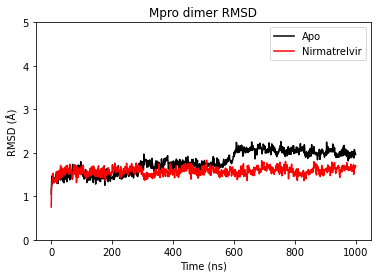

In [12]:
sel = 'protomer'
ad_rmsd_stacked = np.stack((ad_a_rmsd_df[sel],ad_b_rmsd_df[sel]),axis=-1)
ad_rmsd_running_mean = np.mean(ad_rmsd_stacked, axis=-1)

nd_rmsd_stacked = np.stack((nd_a_rmsd_df[sel],nd_b_rmsd_df[sel]),axis=-1)
nd_rmsd_running_mean = np.mean(nd_rmsd_stacked,axis=-1)

plt.plot(ad_rmsd_running_mean,color='black',label='Apo')
plt.plot(nd_rmsd_running_mean,color='red',label='Nirmatrelvir')
plt.ylim(0,5)
plt.ylabel('RMSD (Å)')
plt.xlabel('Time (ns)')
plt.legend()
plt.title('Mpro dimer RMSD')

plt.savefig('/Users/javingfun/Downloads/mpro_dimer_rmsd_all.png')

In [ ]:
sel = 'protomer'
ad_rmsd_stacked = np.stack((ad_a_rmsd_df[sel],ad_b_rmsd_df[sel]),axis=-1)
ad_rmsd_running_mean = np.mean(ad_rmsd_stacked, axis=-1)

nd_rmsd_stacked = np.stack((nd_a_rmsd_df[sel],nd_b_rmsd_df[sel]),axis=-1)
nd_rmsd_running_mean = np.mean(nd_rmsd_stacked,axis=-1)

plt.plot(ad_rmsd_running_mean,color='blue',label='Apo')
plt.plot(nd_rmsd_running_mean,color='darkorange',label='Nirmatrelvir')
plt.ylim(0,5)
plt.ylabel('RMSD (Å)')
plt.xlabel('Time (ns)')
plt.legend()
plt.title('Full dimer RMSD')

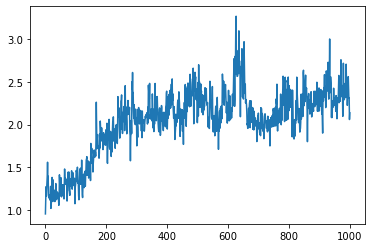

In [23]:
plt.plot(am_rmsd_df['interface_2'])

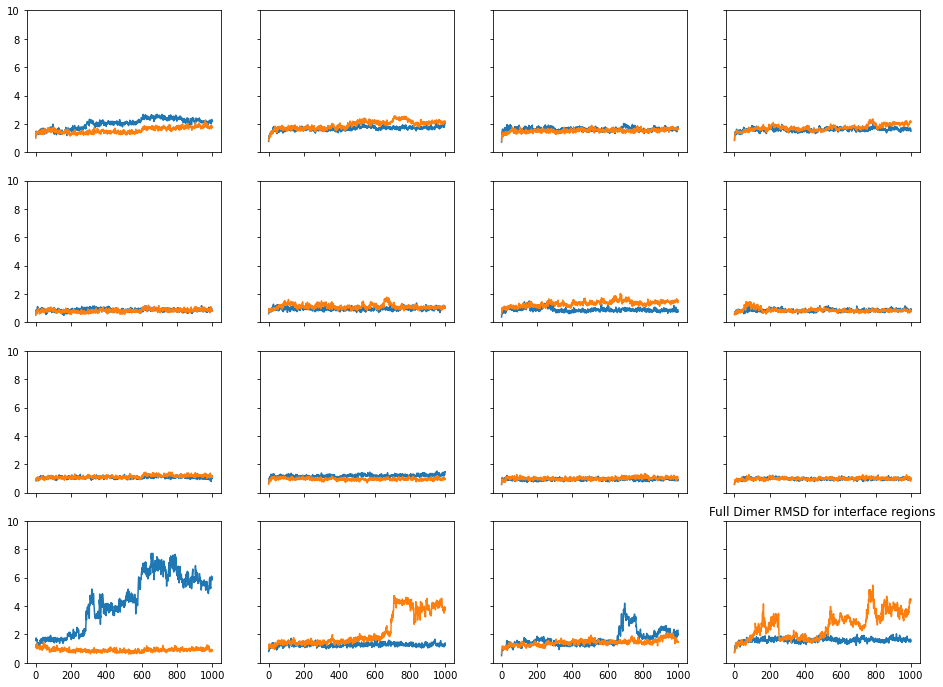

In [163]:
fig, ax = plt.subplots(4,4,sharey=True,sharex=True,figsize=(16,12))
plt.ylim(0,10)
plt.title('Full Dimer RMSD for interface regions')

ax[0,0].plot(ad_a_rmsd_df['protomer'])
ax[0,0].plot(ad_b_rmsd_df['protomer'])
ax[1,0].plot(ad_a_rmsd_df['interface_1'])
ax[1,0].plot(ad_b_rmsd_df['interface_1'])
ax[2,0].plot(ad_a_rmsd_df['interface_2'])
ax[2,0].plot(ad_b_rmsd_df['interface_2'])
ax[3,0].plot(ad_a_rmsd_df['interface_3'])
ax[3,0].plot(ad_b_rmsd_df['interface_3'])

ax[0,1].plot(pd_a_rmsd_df['protomer'])
ax[0,1].plot(pd_b_rmsd_df['protomer'])
ax[1,1].plot(pd_a_rmsd_df['interface_1'])
ax[1,1].plot(pd_b_rmsd_df['interface_1'])
ax[2,1].plot(pd_a_rmsd_df['interface_2'])
ax[2,1].plot(pd_b_rmsd_df['interface_2'])
ax[3,1].plot(pd_a_rmsd_df['interface_3'])
ax[3,1].plot(pd_b_rmsd_df['interface_3'])

ax[0,2].plot(nd_a_rmsd_df['protomer'])
ax[0,2].plot(nd_b_rmsd_df['protomer'])
ax[1,2].plot(nd_a_rmsd_df['interface_1'])
ax[1,2].plot(nd_b_rmsd_df['interface_1'])
ax[2,2].plot(nd_a_rmsd_df['interface_2'])
ax[2,2].plot(nd_b_rmsd_df['interface_2'])
ax[3,2].plot(nd_a_rmsd_df['interface_3'])
ax[3,2].plot(nd_b_rmsd_df['interface_3'])

ax[0,3].plot(ed_a_rmsd_df['protomer'])
ax[0,3].plot(ed_b_rmsd_df['protomer'])
ax[1,3].plot(ed_a_rmsd_df['interface_1'])
ax[1,3].plot(ed_b_rmsd_df['interface_1'])
ax[2,3].plot(ed_a_rmsd_df['interface_2'])
ax[2,3].plot(ed_b_rmsd_df['interface_2'])
ax[3,3].plot(ed_a_rmsd_df['interface_3'])
ax[3,3].plot(ed_b_rmsd_df['interface_3'])


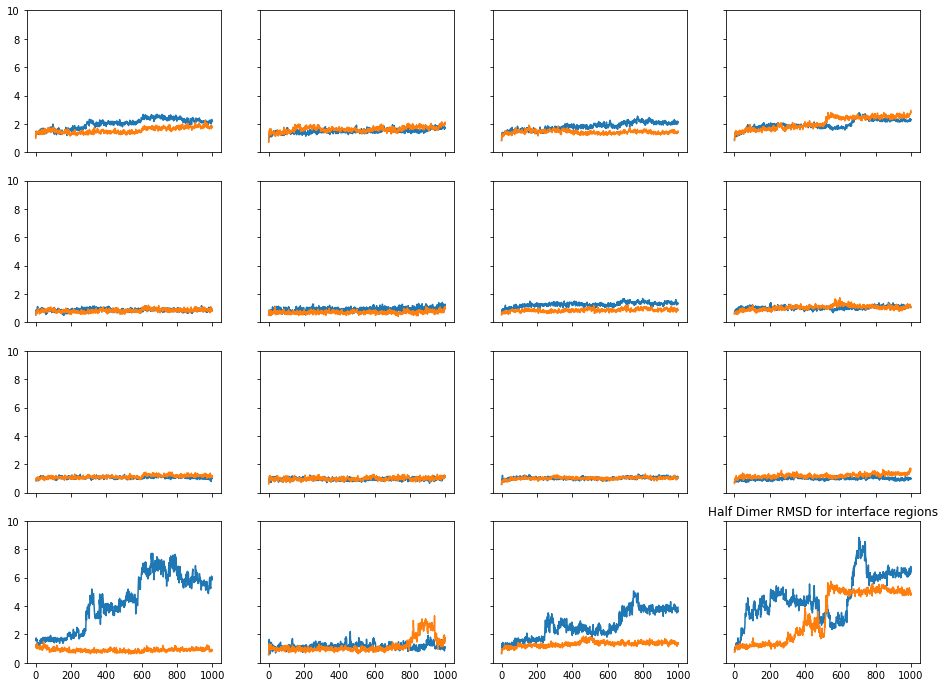

In [164]:
fig, ax = plt.subplots(4,4,sharey=True,sharex=True,figsize=(16,12))
plt.ylim(0,10)
plt.title('Half Dimer RMSD for interface regions')

ax[0,0].plot(ad_a_rmsd_df['protomer'])
ax[0,0].plot(ad_b_rmsd_df['protomer'])
ax[1,0].plot(ad_a_rmsd_df['interface_1'])
ax[1,0].plot(ad_b_rmsd_df['interface_1'])
ax[2,0].plot(ad_a_rmsd_df['interface_2'])
ax[2,0].plot(ad_b_rmsd_df['interface_2'])
ax[3,0].plot(ad_a_rmsd_df['interface_3'])
ax[3,0].plot(ad_b_rmsd_df['interface_3'])

ax[0,1].plot(pa_a_rmsd_df['protomer'])
ax[0,1].plot(pa_b_rmsd_df['protomer'])
ax[1,1].plot(pa_a_rmsd_df['interface_1'])
ax[1,1].plot(pa_b_rmsd_df['interface_1'])
ax[2,1].plot(pa_a_rmsd_df['interface_2'])
ax[2,1].plot(pa_b_rmsd_df['interface_2'])
ax[3,1].plot(pa_a_rmsd_df['interface_3'])
ax[3,1].plot(pa_b_rmsd_df['interface_3'])

ax[0,2].plot(na_a_rmsd_df['protomer'])
ax[0,2].plot(na_b_rmsd_df['protomer'])
ax[1,2].plot(na_a_rmsd_df['interface_1'])
ax[1,2].plot(na_b_rmsd_df['interface_1'])
ax[2,2].plot(na_a_rmsd_df['interface_2'])
ax[2,2].plot(na_b_rmsd_df['interface_2'])
ax[3,2].plot(na_a_rmsd_df['interface_3'])
ax[3,2].plot(na_b_rmsd_df['interface_3'])

ax[0,3].plot(ea_a_rmsd_df['protomer'])
ax[0,3].plot(ea_b_rmsd_df['protomer'])
ax[1,3].plot(ea_a_rmsd_df['interface_1'])
ax[1,3].plot(ea_b_rmsd_df['interface_1'])
ax[2,3].plot(ea_a_rmsd_df['interface_2'])
ax[2,3].plot(ea_b_rmsd_df['interface_2'])
ax[3,3].plot(ea_a_rmsd_df['interface_3'])
ax[3,3].plot(ea_b_rmsd_df['interface_3'])

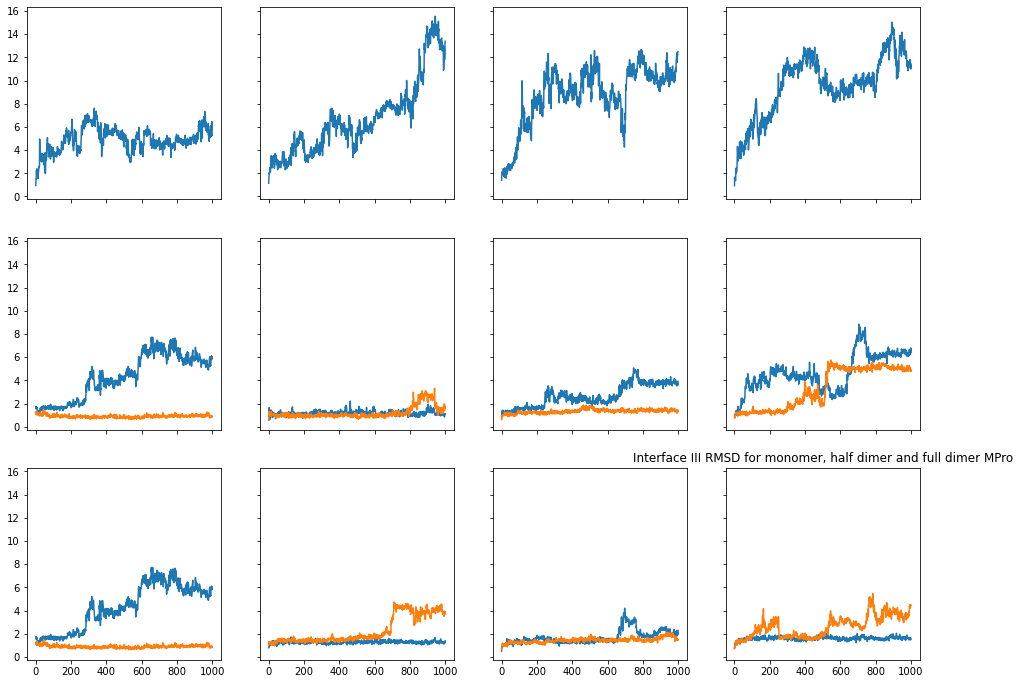

In [173]:
fig, ax = plt.subplots(3,4, sharex=True, sharey=True, figsize=(16,12))
plt.title('Interface III RMSD for monomer, half dimer and full dimer MPro')

#monomer RMSD for interface III 
ax[0,0].plot(am_rmsd_df['interface_3'])
ax[0,1].plot(pm_rmsd_df['interface_3'])
ax[0,2].plot(nm_rmsd_df['interface_3'])
ax[0,3].plot(em_rmsd_df['interface_3'])

#half dimer RMSD for interface III
ax[1,0].plot(ad_a_rmsd_df['interface_3'])
ax[1,0].plot(ad_b_rmsd_df['interface_3'])

ax[1,1].plot(pa_a_rmsd_df['interface_3'])
ax[1,1].plot(pa_b_rmsd_df['interface_3'])

ax[1,2].plot(na_a_rmsd_df['interface_3'])
ax[1,2].plot(na_b_rmsd_df['interface_3'])

ax[1,3].plot(ea_a_rmsd_df['interface_3'])
ax[1,3].plot(ea_b_rmsd_df['interface_3'])

#full dimer RMSD for interface III
ax[2,0].plot(ad_a_rmsd_df['interface_3'])
ax[2,0].plot(ad_b_rmsd_df['interface_3'])

ax[2,1].plot(pd_a_rmsd_df['interface_3'])
ax[2,1].plot(pd_b_rmsd_df['interface_3'])

ax[2,2].plot(nd_a_rmsd_df['interface_3'])
ax[2,2].plot(nd_b_rmsd_df['interface_3'])

ax[2,3].plot(ed_a_rmsd_df['interface_3'])
ax[2,3].plot(ed_b_rmsd_df['interface_3'])

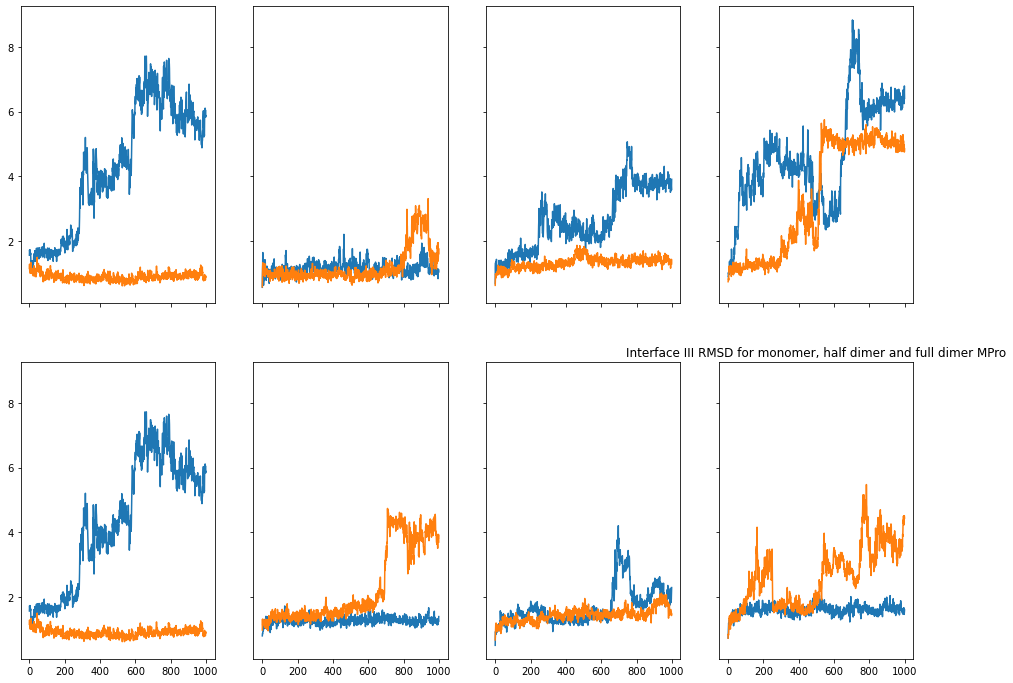

In [174]:
fig, ax = plt.subplots(2,4, sharex=True, sharey=True, figsize=(16,12))
plt.title('Interface III RMSD for monomer, half dimer and full dimer MPro')


#half dimer RMSD for interface III
ax[0,0].plot(ad_a_rmsd_df['interface_3'])
ax[0,0].plot(ad_b_rmsd_df['interface_3'])

ax[0,1].plot(pa_a_rmsd_df['interface_3'])
ax[0,1].plot(pa_b_rmsd_df['interface_3'])

ax[0,2].plot(na_a_rmsd_df['interface_3'])
ax[0,2].plot(na_b_rmsd_df['interface_3'])

ax[0,3].plot(ea_a_rmsd_df['interface_3'])
ax[0,3].plot(ea_b_rmsd_df['interface_3'])

#full dimer RMSD for interface III
ax[1,0].plot(ad_a_rmsd_df['interface_3'])
ax[1,0].plot(ad_b_rmsd_df['interface_3'])

ax[1,1].plot(pd_a_rmsd_df['interface_3'])
ax[1,1].plot(pd_b_rmsd_df['interface_3'])

ax[1,2].plot(nd_a_rmsd_df['interface_3'])
ax[1,2].plot(nd_b_rmsd_df['interface_3'])

ax[1,3].plot(ed_a_rmsd_df['interface_3'])
ax[1,3].plot(ed_b_rmsd_df['interface_3'])

### RMSF

In [19]:
def write_rmsf(rep_list,ref,name,state):
    
    ## rep_list (list of universes for each replica)
    ## ref (reference structure: pdb from equilibration)
    ## name (abbreviated: am, ad...)
    ## state (monomer, dimer)
    
    #set output directory
    data_path="./test_data/"
    
    #set output dataframe (will contain running average of all selection RMSD's)
    avg_result=pd.DataFrame()
    
    def calc_rmsf(rep,ref,sel):
    
        #generate average structure to use as reference
        average = align.AverageStructure(rep,ref,select='backbone and name CA',ref_frame=0).run()
        print(average.results.universe)

        #align trajectory to reference
        aligner = align.AlignTraj(rep,ref,select='backbone and name CA',in_memory=True).run()

        #calculate RMSF
        c_alphas = rep.select_atoms(sel)
        R = rms.RMSF(c_alphas).run()

        return(c_alphas.resids,R.results.rmsf)
    
    
    def get_mean_rmsf(rmsf_list):
        stacked_arrays = np.stack((rmsf_list[0][1], rmsf_list[1][1], rmsf_list[2][1]), axis =-1)
        average = np.mean(stacked_arrays, axis=-1)
        
        return average
    
    
    
    ### handles the writing of an array that contains one column per replica and a final column with the running avg
    ### each array will have one system (apo dimer for example)and one selection (domain I, cterm, etc)

    ## result is where all of the running averages will go for a given system 
    ## each column would/should reflect the running rmsd for a given selection averaged over all replicas of the same system (ie apo dimer)
    
    
    
    ##iterate over the selections in the selections dictionary for all ranges and sites
    for region,residues in selections.items():
        
        #calculate rmsd for all ranges in the dict
        if region == 'ranges':
            for range_name in residues.keys():
                #create string selection of range, store in variable
                sel = range_name
                range_string = create_selection(range_name,region,state)
                
                #create empty np array to store triplicate data and get running average
                start = selections['ranges'][range_name][0]
                stop = selections['ranges'][range_name][1]
                
                
                
                #create a rmsd list to calculate the running average of triplicates
                
                #iterate over replica list, obtaining rmsd per triplicate and running average
                for rep in rep_list:
                    rep_rmsf=calc_rmsf(rep,ref,range_string)
                    print(rep_rmsf[1])
                    #for running average 
                    rmsf_list.append(rep_rmsf[1])
                    
                    #final array with triplicate AND running average
                    rmsf_array=np.concatenate((rmsf_array,rep_rmsf[:,]),axis=0)
                
                #calculate running average from all replicates
                running_mean=get_mean_rmsf(rmsf_list)
                
                #append running average to final array (rmsd_array)
                rmsf_array=np.concatenate((rmsf_array,running_mean))
                
                #save file as numpy array for later use (per selection rmsd)
                with open(data_path+'{}_{}_rmsf.npy'.format(name,sel),'wb') as f:
                    np.save(f,rmsf_array)
                    
                
                #convert running mean array to pandas data frame
                running_mean_df=pd.DataFrame(running_mean,columns=[sel])#index="{}".format(sel))
                
                #append running mean datafram to avg_result
                avg_result=pd.concat((avg_result,running_mean_df),axis=1)          
                
                
        elif region == 'sites':
            for site_name in residues.keys():
                #create string selection of range, store in variable
                sel = site_name
                site_string = create_selection(site_name,region,state)
                
                #create empty np array to store triplicate data and get running average
                rmsd_array=np.array(frames)
                
                #create a rmsd list to calculate the running average of triplicates
                rmsd_list=[]
                
                #iterate over replica list, obtaining rmsd per triplicate and running average
                for rep in rep_list:
                    rep_rmsd=calc_rmsd(rep,ref,site_string)
                    
                    #for running average 
                    rmsd_list.append(rep_rmsd[:,3])
                    
                    #final array with triplicate AND running average
                    rmsd_array=np.concatenate((rmsd_array,rep_rmsd[:,3]),axis=0)
                
                #calculate running average from all replicates
                running_mean=get_running_mean(rmsd_list)
                
                #append running average to final array (rmsd_array)
                rmsd_array=np.concatenate((rmsd_array,running_mean))
                
                #save file as numpy array for later use (per selection rmsd)
                with open(data_path+'{}_{}.npy'.format(name,sel),'wb') as f:
                    np.save(f,rmsd_array)
                    
                
                #convert running mean array to pandas data frame
                running_mean_df=pd.DataFrame(running_mean,columns=[sel])#index="{}".format(sel))
                
                #append running mean datafram to avg_result
                avg_result=pd.concat((avg_result,running_mean_df),axis=1)  

        
    #save dataframe to CSV file for future use
    avg_result.to_csv(data_path+"{}_rmsf_df.csv".format(name))    

In [20]:
write_rmsf(am_list,am_0,'am','monomer')

<Universe with 306 atoms>
[ 5.37451679  3.95396477  2.23273103  1.33645644  1.08868421  0.93488709
  0.84263287  0.86896756  1.03043184  0.95527739  1.07377033  1.12742002
  0.81975343  0.8127391   0.88276377  0.68412631  0.60882909  0.58131021
  0.61572171  0.58327767  0.81055018  0.99081606  1.58759014  1.58545394
  1.05557318  0.82023446  0.66992778  0.53663856  0.54242987  0.49328409
  0.54952768  0.66121815  0.88038434  0.80156052  0.63413863  0.50008179
  0.47174557  0.45491251  0.49140382  0.58695923  0.61541815  0.65633827
  0.76881674  1.08486568  1.62095451  2.4810759   2.88812564  2.2461553
  1.91416298  1.9283049   1.60072514  1.28701809  1.27251842  1.07054386
  1.37380386  1.26968976  1.1106667   1.09090174  1.32427968  1.35704886
  1.13300603  1.21676658  1.04618384  1.17172403  0.9933317   0.85983822
  0.84888256  0.67500442  0.80314193  0.853032    1.33165425  1.87201405
  1.36428184  1.0738412   0.89355142  0.96137138  0.83280176  0.95833883
  0.92378071  0.88426486  

NameError: name 'rmsf_list' is not defined

In [192]:
for region,residues in selections.items():
    for range_name in residues.keys():
        if region == 'ranges':
            sel = range_name
            start = selections['ranges'][range_name][0]
            stop = selections['ranges'][range_name][1]

            print(range(start,stop))

range(1, 306)
range(1, 14)
range(8, 101)
range(40, 55)
range(102, 184)
range(185, 200)
range(201, 303)
range(290, 306)
range(131, 146)
range(142, 145)
range(1, 14)
range(109, 172)
range(290, 306)
